In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/TitanicProject')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
 from sklearn.model_selection import train_test_split

In [ ]:
train = pd.read_csv('./titanic_train.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


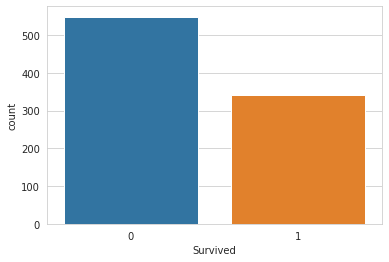

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

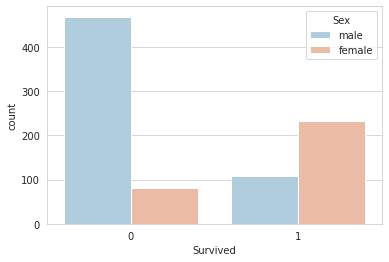

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

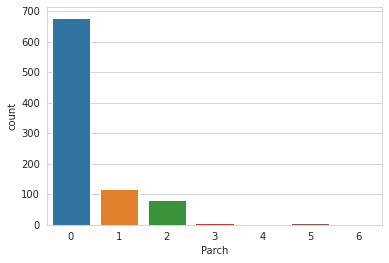

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Parch',data=train)

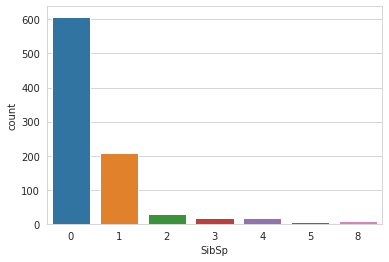

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='SibSp',data=train)

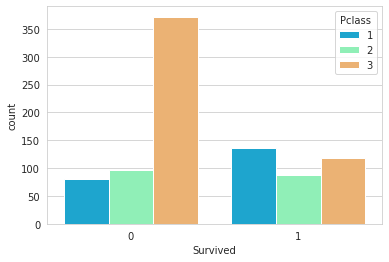

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train[train['Pclass'] == 2].median()

PassengerId    435.50
Survived         0.00
Pclass           2.00
Age             29.00
SibSp            0.00
Parch            0.00
Fare            14.25
dtype: float64

In [ ]:
train[train['Pclass'] == 3].median()

PassengerId    432.00
Survived         0.00
Pclass           3.00
Age             24.00
SibSp            0.00
Parch            0.00
Fare             8.05
dtype: float64

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return train[train['Pclass'] == 1].median().Age

        elif Pclass == 2:
            return train[train['Pclass'] == 2].median().Age

        else:
            return train[train['Pclass'] == 3].median().Age

    else:
        return Age

In [ ]:
train['Age'] =  train[['Age','Pclass']].apply(impute_age,axis=1)

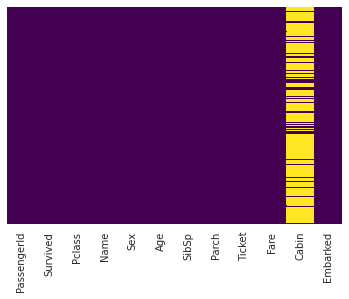

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train['AgeBand'] = pd.cut(train['Age'], 3)

print (train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

            AgeBand  Survived
0    (0.34, 26.947]  0.360440
1  (26.947, 53.473]  0.419689
2    (53.473, 80.0]  0.320000


In [ ]:
train_test_data = [train]
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 27, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 54), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 54) & (dataset['Age'] <= 80), 'Age'] = 2
    dataset.loc[ dataset['Age'] > 80, 'Age'] = 3

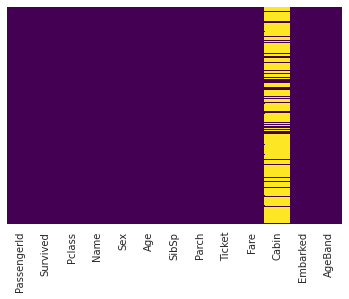

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeBand          0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  AgeBand      891 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.7+ KB


In [ ]:
train_test_data = [train] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')

In [ ]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', \
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,0.0,1,0,A/5 21171,7.2500,NaN,S,"(0.34, 26.947]",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1.0,1,0,PC 17599,71.2833,C85,C,"(26.947, 53.473]",3
2,3,1,3,"Heikkinen, Miss. Laina",female,0.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(0.34, 26.947]",2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1.0,1,0,113803,53.1000,C123,S,"(26.947, 53.473]",3
4,5,0,3,"Allen, Mr. William Henry",male,1.0,0,0,373450,8.0500,NaN,S,"(26.947, 53.473]",1


In [ ]:
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [ ]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [ ]:
for dataset in train_test_data:
    #print(dataset.Embarked.unique())
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,0.0,1,0,A/5 21171,7.2500,NaN,0,"(0.34, 26.947]",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1.0,1,0,PC 17599,71.2833,C85,1,"(26.947, 53.473]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,0.0,0,0,STON/O2. 3101282,7.9250,NaN,0,"(0.34, 26.947]",2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1.0,1,0,113803,53.1000,C123,0,"(26.947, 53.473]",3
4,5,0,3,"Allen, Mr. William Henry",0,1.0,0,0,373450,8.0500,NaN,0,"(26.947, 53.473]",1


In [ ]:
for dataset in train_test_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

In [ ]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
print (train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [ ]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1

print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [ ]:
for dataset in train_test_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,Title,FareBand,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,0.0,1,0,A/5 21171,0,NaN,0,"(0.34, 26.947]",1,"(-0.001, 7.91]",2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1.0,1,0,PC 17599,3,C85,1,"(26.947, 53.473]",3,"(31.0, 512.329]",2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,0.0,0,0,STON/O2. 3101282,1,NaN,0,"(0.34, 26.947]",2,"(7.91, 14.454]",1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1.0,1,0,113803,3,C123,0,"(26.947, 53.473]",3,"(31.0, 512.329]",2,0
4,5,0,3,"Allen, Mr. William Henry",0,1.0,0,0,373450,1,NaN,0,"(26.947, 53.473]",1,"(7.91, 14.454]",1,1


In [ ]:
train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.014872,-0.057527,-0.001652,-0.023689,-0.030467,0.003878,-0.040143,0.057462
Survived,-0.005007,1.000000,-0.338481,0.543351,0.013513,-0.035322,0.081629,0.295875,0.106811,0.407753,0.016639,-0.203367
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.437335,0.083081,0.018443,-0.628459,0.045702,-0.173929,0.065997,0.135207
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.052513,0.114631,0.245489,0.248940,0.116569,0.502713,0.200988,-0.303646
Age,0.014872,0.013513,-0.437335,-0.052513,1.000000,-0.178108,-0.084401,0.206635,-0.112165,0.012897,-0.163896,0.085095
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.178108,1.000000,0.414838,0.394248,-0.059961,0.269623,0.890712,-0.584471
Parch,-0.001652,0.081629,0.018443,0.245489,-0.084401,0.414838,1.000000,0.393048,-0.078665,0.315784,0.783111,-0.583398
Fare,-0.023689,0.295875,-0.628459,0.248940,0.206635,0.394248,0.393048,1.000000,-0.091096,0.341665,0.465815,-0.568942
Embarked,-0.030467,0.106811,0.045702,0.116569,-0.112165,-0.059961,-0.078665,-0.091096,1.000000,0.045400,-0.080281,0.017807
Title,0.003878,0.407753,-0.173929,0.502713,0.012897,0.269623,0.315784,0.341665,0.045400,1.000000,0.342039,-0.405813


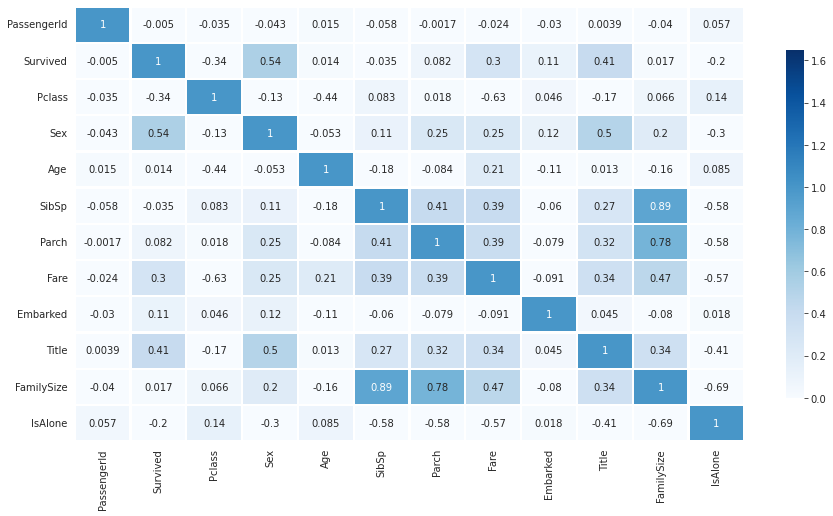

In [ ]:
sns.heatmap(train.corr(), cmap="Blues", vmin= 0, vmax=1.65,
           linewidth=1.3, cbar_kws={"shrink": .8},annot=True)
plt.gcf().set_size_inches(15, 8)
plt.show()

In [ ]:
train.drop('Cabin', axis=1, inplace=True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeBand,Title,FareBand,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,0.0,1,0,A/5 21171,0,0,"(0.34, 26.947]",1,"(-0.001, 7.91]",2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1.0,1,0,PC 17599,3,1,"(26.947, 53.473]",3,"(31.0, 512.329]",2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,0.0,0,0,STON/O2. 3101282,1,0,"(0.34, 26.947]",2,"(7.91, 14.454]",1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1.0,1,0,113803,3,0,"(26.947, 53.473]",3,"(31.0, 512.329]",2,0
4,5,0,3,"Allen, Mr. William Henry",0,1.0,0,0,373450,1,0,"(26.947, 53.473]",1,"(7.91, 14.454]",1,1


In [ ]:
features_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'FamilySize', 'PassengerId', 'AgeBand', 'FareBand']
train = train.drop(features_drop, axis=1)

In [ ]:
x = train.drop('Survived', axis=1)
y= train['Survived']

In [ ]:
x.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,3,0,0.0,0,0,1,0
1,1,1,1.0,3,1,3,0
2,3,1,0.0,1,0,2,1
3,1,1,1.0,3,0,3,0
4,3,0,1.0,1,0,1,1


In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=100, random_state=4)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((791, 7), (100, 7), (791,), (100,))

In [ ]:
X_train = x_train.drop(['Embarked', 'Title', 'IsAlone'], axis=1)
X_test = x_test.drop(['Embarked', 'Title', 'IsAlone'], axis=1)

In [ ]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

###Without feature engineering

In [ ]:
X_train.head()

,Pclass,Sex,Age,Fare
224,1,0,1.0,3
74,3,0,1.0,3
881,3,0,1.0,0
138,3,0,0.0,1
163,3,0,0.0,1


In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
y_pred_log_reg = logmodel.predict(X_test)
test_accuracy = round( logmodel.score(X_test, y_test) * 100, 2)
train_accuracy = round( logmodel.score(X_train, y_train) * 100, 2)
print ('Training Accuracy ' + str(train_accuracy) + ' percent')
print ('Testing Accuracy ' + str(test_accuracy) + ' percent')

Training Accuracy 78.89 percent
Testing Accuracy 83.0 percent


In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_decision_tree = clf.predict(X_test)
train_acc = round(clf.score(X_train, y_train) * 100, 2)
test_acc = round(clf.score(X_test, y_test) * 100, 2)
print ('Training Accuracy ' + str(train_acc) + ' percent')
print ('Testing Accuracy ' + str(test_acc) + ' percent')

Training Accuracy 81.54 percent
Testing Accuracy 87.0 percent


In [ ]:
X_train = x_train
X_test = x_test

##With feature engineering

In [ ]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
224,1,0,1.0,3,0,1,0
74,3,0,1.0,3,0,1,1
881,3,0,1.0,0,0,1,1
138,3,0,0.0,1,0,1,1
163,3,0,0.0,1,0,1,1


In [ ]:
X_train.shape, y_train.shape, X_test.shape

((791, 7), (791,), (100, 7))

##Using Logistic Regression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
y_pred_log_reg = logmodel.predict(X_test)
test_accuracy = round( logmodel.score(X_test, y_test) * 100, 2)
train_accuracy = round( logmodel.score(X_train, y_train) * 100, 2)
print ('Training Accuracy ' + str(train_accuracy) + ' percent')
print ('Testing Accuracy ' + str(test_accuracy) + ' percent')

Training Accuracy 78.63 percent
Testing Accuracy 83.0 percent


##Using Decision Tree

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_decision_tree = clf.predict(X_test)
train_acc = round(clf.score(X_train, y_train) * 100, 2)
test_acc = round(clf.score(X_test, y_test) * 100, 2)
print ('Training Accuracy ' + str(train_acc) + ' percent')
print ('Testing Accuracy ' + str(test_acc) + ' percent')

Training Accuracy 86.6 percent
Testing Accuracy 85.0 percent


In [ ]:
y_pred_decision_tree

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [ ]:
df = pd.read_csv('./titanic_train.csv')

In [ ]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df.Age.isnull().sum()

0

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
X = np.array(list(zip(df['Age'], df['Age']))).reshape(len(df['Age']), 2)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

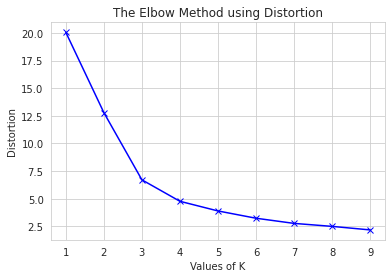

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
X = np.array(list(zip(df['Fare'], df['Fare']))).reshape(len(df['Fare']), 2)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

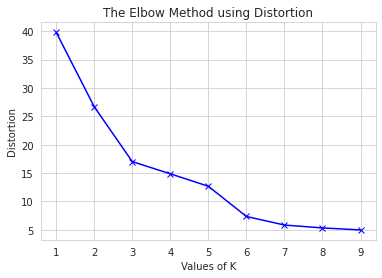

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()